In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Loading data

In [22]:
#the datasets are created the original dataset is preserved 
raw_df = pd.read_csv("./data/hotel_bookings_clean.csv", low_memory=False)
df = raw_df.copy()

### Explore data

In [211]:
# Size of the dataset
rows,cols = df.shape
print(f"This dataset contains {rows} rows and {cols} columns")

This dataset contains 56501 rows and 36 columns


In [24]:
#types of the the attributes in the dataset
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##### Create a new column for total nights

In [25]:
# A new column for the total_nights is created
df['total_nights']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


### Univariate Analysis
##### The following attributes are selected as relevant for univariate analysis

##### Categorical variables

In [239]:
# relative frequency of is_canceled
stats_is_canceled=df['is_canceled'].value_counts(dropna=False, normalize=True)
cancel_rate=100*stats_is_canceled.iloc[1].round(3)

print(f"Insight: {cancel_rate}% of the bookings are canceled")
display(stats_is_canceled)

Insight: 41.4% of the bookings are canceled


is_canceled
0    0.586007
1    0.413993
Name: proportion, dtype: float64

In [248]:
# relative frequency of market_segment
stats_market_segment=df['market_segment'].value_counts(dropna=False, normalize=True)
#Adjust data for print
count=stats_market_segment.count()
top2=stats_market_segment.head(2)
p1=100*top2.iloc[0].round(3)
p2=100*top2.iloc[1].round(3)

print(f"There are {count} possible attributes. The two most relevant are {top2.index[0]} with {p1}% and {top2.index[1]} with {p2}%")
display(stats_market_segment)


There are 7 possible attributes. The two most relevant are Online TA with 44.0% and Offline TA/TO with 21.2%


market_segment
Online TA        0.439798
Offline TA/TO    0.212279
Groups           0.177784
Direct           0.123927
Corporate        0.041557
Complementary    0.004283
Aviation         0.000372
Name: proportion, dtype: float64

In [260]:
# relative frequency of Hotel
stats_hotel = df['hotel'].value_counts(dropna=False, normalize=True)

#Adjust data for print
count=stats_hotel.count()
p1=100*stats_hotel.iloc[0].round(3)
p2=100*stats_hotel.iloc[1].round(2)

print(f"There are {count} possible attributes. {stats_hotel.index[0]} with {p1}% and {stats_hotel.index[1]} with {p2}%")
display(stats_hotel)


There are 2 possible attributes. Resort Hotel with 67.7% and City Hotel with 32.0%


hotel
Resort Hotel    0.677386
City Hotel      0.322614
Name: proportion, dtype: float64

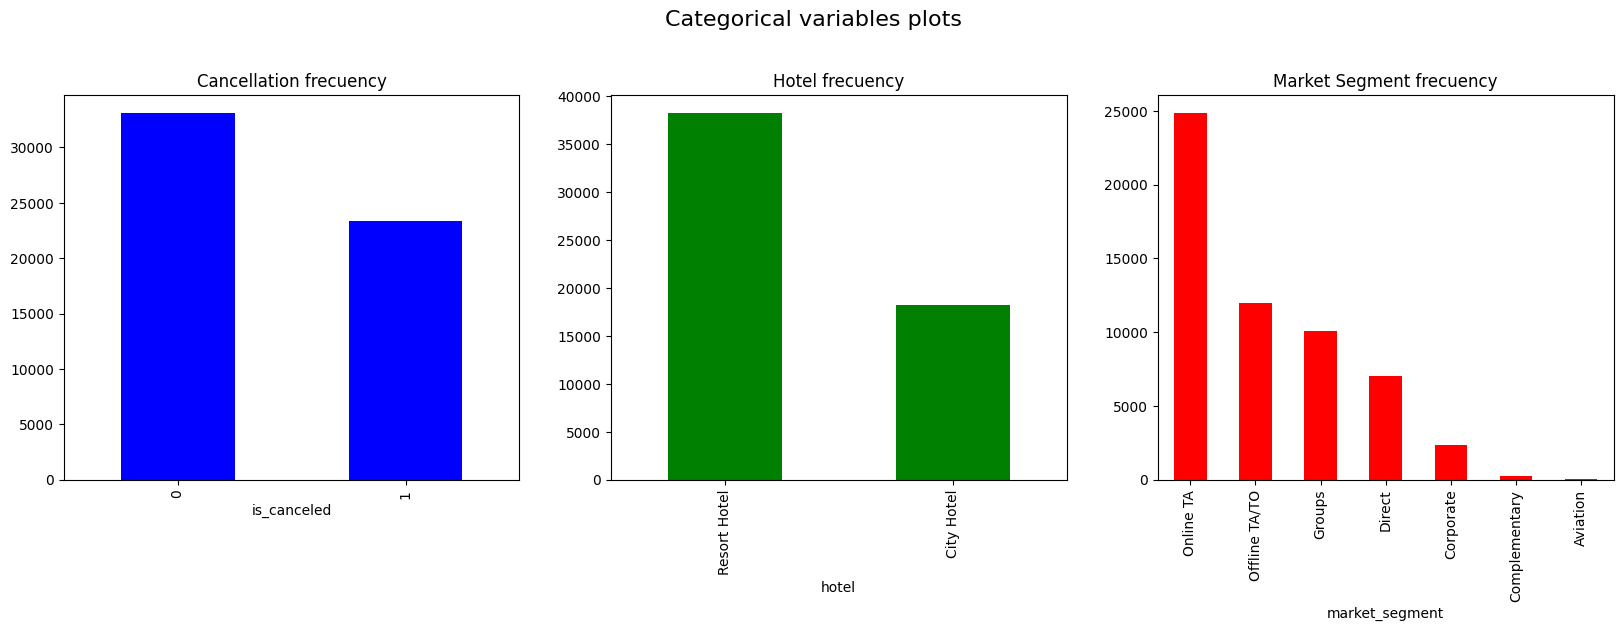

In [255]:
#Create frequency distribution plots for all categoric variables

fig, (plt1,plt2,plt3)= plt.subplots(1,3, figsize=(20, 5))
df['is_canceled'].value_counts().plot(kind='bar',ax=plt1, color='blue')
df['hotel'].value_counts().plot(kind='bar',ax=plt2, color='green')
df['market_segment'].value_counts().plot(kind='bar',ax=plt3, color='red')
plt1.set_title("Cancellation frecuency")
plt2.set_title("Hotel frecuency")
plt3.set_title("Market Segment frecuency")
fig.suptitle("Categorical variables plots", fontsize=16, y=1.05)
plt.show()

##### Numeric variables

In [252]:
#statistics of lead_time including percentiles 5 and 95
stats_ldead_time= df['lead_time'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
skewness=df['lead_time'].skew().round(3)
Kurtosis=df['lead_time'].kurtosis().round(3)

#Adjust variables for print
mean=stats_ldead_time.iloc[1].round(2)
median=stats_ldead_time.iloc[6].round(2)
std=stats_ldead_time.iloc[2].round(2)

print(f"Lead time has a mean of {mean}, median {median} and standard deviation of {std}. A skewness of {skewness} and Kurtosis {Kurtosis}")

display(stats_ldead_time)

Lead time has a mean of 100.54, median 69.0 and standard deviation of 101.16. A skewness of 1.205 and Kurtosis 1.001


count    56501.000000
mean       100.544610
std        101.160815
min          0.000000
5%           0.000000
25%         17.000000
50%         69.000000
75%        158.000000
95%        309.000000
max        737.000000
Name: lead_time, dtype: float64

In [253]:
#statistics of adr
stats_adr=df['adr'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
skewness=df['adr'].skew().round(3)
Kurtosis=df['adr'].kurtosis().round(3)

#Adjust variables for print
mean=stats_adr.iloc[1].round(2)
median=stats_adr.iloc[6].round(2)
std=stats_adr.iloc[2].round(2)

print(f"adr has a mean of {mean}, median {median} and standard deviation of {std}. A skewness of {skewness} and Kurtosis {Kurtosis}")
display(stats_adr)

adr has a mean of 96.48, median 84.71 and standard deviation of 54.3. A skewness of 1.237 and Kurtosis 1.994


count    56501.000000
mean        96.484815
std         54.296987
min          0.000000
5%          34.510000
25%         60.000000
50%         84.710000
75%        120.270000
95%        207.900000
max        508.000000
Name: adr, dtype: float64

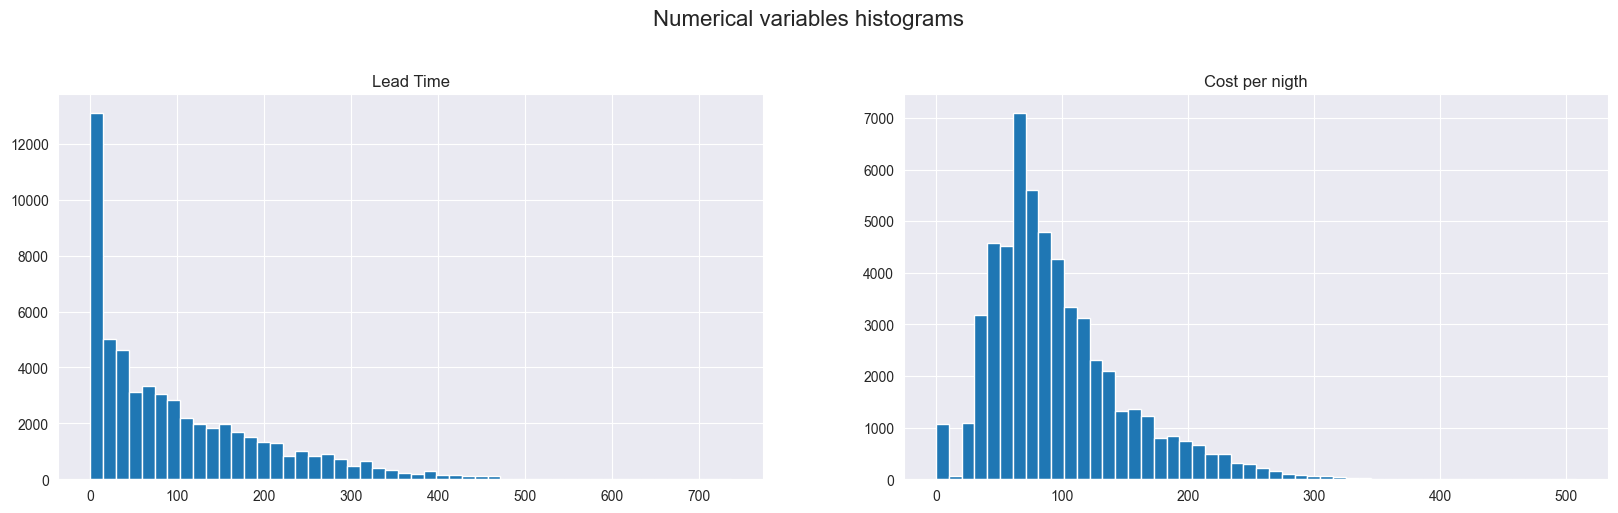

In [33]:
#Create histogram for all numeric variables
fig, (plt1,plt2)= plt.subplots(1,2, figsize=(20, 5))

plt1.hist(df["lead_time"], bins=50)
plt1.set_title("Lead Time")

plt2.hist(df["adr"], bins=50)
plt2.set_title("Cost per nigth")

fig.suptitle("Numerical variables histograms", fontsize=16, y=1.05)
plt.show()

### Bivariate Analysis

### Impact of cacelations on revenue

In [202]:
df["expected_value"] = df["adr"] * df["total_nights"]

summary_cancellations = (
    df.groupby("is_canceled")["expected_value"].agg(
        bookings=("count"),
        expected_value=("sum"),
        value_per_booking=("mean")
    )
)

display(summary_cancellations)

,bookings,expected_value,value_per_booking
is_canceled,,,
0,33110,12575707.13,379.815981
1,23391,9714626.09,415.314698


##### Correlation

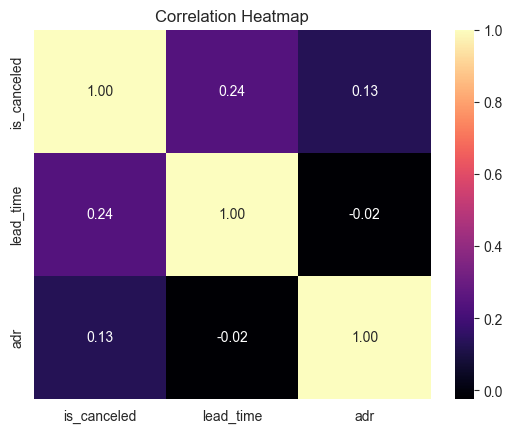

In [64]:
corrmat = df[['is_canceled', 'lead_time', 'adr']].corr()

plt.figure()
sns.heatmap(corrmat,
            annot=True,
            cmap='magma',
            fmt=".2f"
            )
plt.title('Correlation Heatmap')
plt.show()

##### Cancellation rate per segment (categorical variables)

In [275]:
#Explore the cancelation rate per hotel type
summary_hotel = (
    df.groupby("hotel")["is_canceled"].agg(
        bookings=("count"),
        cancellations=("sum"),
        cancellation_rate=("mean")
    ).sort_values("cancellation_rate", ascending=False)
)
#Add share of bookings and  cancellations 
summary_hotel["share_of_total_bookings"] = (summary_hotel["bookings"] / summary_hotel["bookings"].sum())
summary_hotel["share_of_total_cancellations"] = (summary_hotel["cancellations"] / summary_hotel["cancellations"].sum())

#Adjust for print

delta_cancel=100*((summary_hotel["cancellation_rate"].iloc[0]-summary_hotel["cancellation_rate"].iloc[1])/summary_hotel["cancellation_rate"].iloc[1]).round(3)
h1_share=100*summary_hotel["share_of_total_bookings"].iloc[0].round(2)
h1_cancel_share=100*summary_hotel["share_of_total_cancellations"].iloc[0].round(3)

print(f"Insight: {summary_hotel.index[0]} has a cancellation rate {delta_cancel}% higher than {summary_hotel.index[1]}")
print(f"Altough {summary_hotel.index[0]} represents {h1_share}% of bookings it accounts for {h1_cancel_share}% of cancellations")

display(summary_hotel)

Insight: City Hotel has a cancellation rate 148.6% higher than Resort Hotel
Altough City Hotel represents 32.0% of bookings it accounts for 54.2% of cancellations


,bookings,cancellations,cancellation_rate,share_of_total_bookings,share_of_total_cancellations
hotel,,,,,
City Hotel,18228,12681,0.695688,0.322614,0.542132
Resort Hotel,38273,10710,0.279832,0.677386,0.457868


In [291]:
#Explore the cancelation rate per market segment
summary_market = (
    df.groupby("market_segment")["is_canceled"].agg(
        bookings=("count"),
        cancellations=("sum"),
        cancellation_rate=("mean")
    ).sort_values("bookings", ascending=False)
)
#Add share of bookings and  cancellations 
summary_market["share_of_total_bookings"] = (summary_market["bookings"] / summary_hotel["bookings"].sum())
summary_market["share_of_total_cancellations"] = (summary_market["cancellations"] / summary_hotel["cancellations"].sum())

#Adjust for print

delta_cancel=100*((summary_hotel["cancellation_rate"].iloc[0]-summary_hotel["cancellation_rate"].iloc[1])/summary_hotel["cancellation_rate"].iloc[1]).round(3)
h1_share=100*summary_hotel["share_of_total_bookings"].iloc[0].round(2)
h1_cancel_share=100*summary_hotel["share_of_total_cancellations"].iloc[0].round(3)

print(f"Insight: Both {summary_market.index[0]} and {summary_market.index[1]} have a cancellation rate higher than the average ({cancel_rate}%)")
print(f"{summary_market.index[3]} has the lowest cancel rate")

display(summary_market)

Insight: Both Online TA and Offline TA/TO have a cancellation rate higher than the average (41.4%)
Direct has the lowest cancel rate


,bookings,cancellations,cancellation_rate,share_of_total_bookings,share_of_total_cancellations
market_segment,,,,,
Online TA,24849,11601,0.466860,0.439798,0.495960
Offline TA/TO,11994,4614,0.384692,0.212279,0.197255
Groups,10045,5349,0.532504,0.177784,0.228678
Direct,7002,1255,0.179235,0.123927,0.053653
Corporate,2348,505,0.215077,0.041557,0.021590
Complementary,242,46,0.190083,0.004283,0.001967
Aviation,21,21,1.000000,0.000372,0.000898


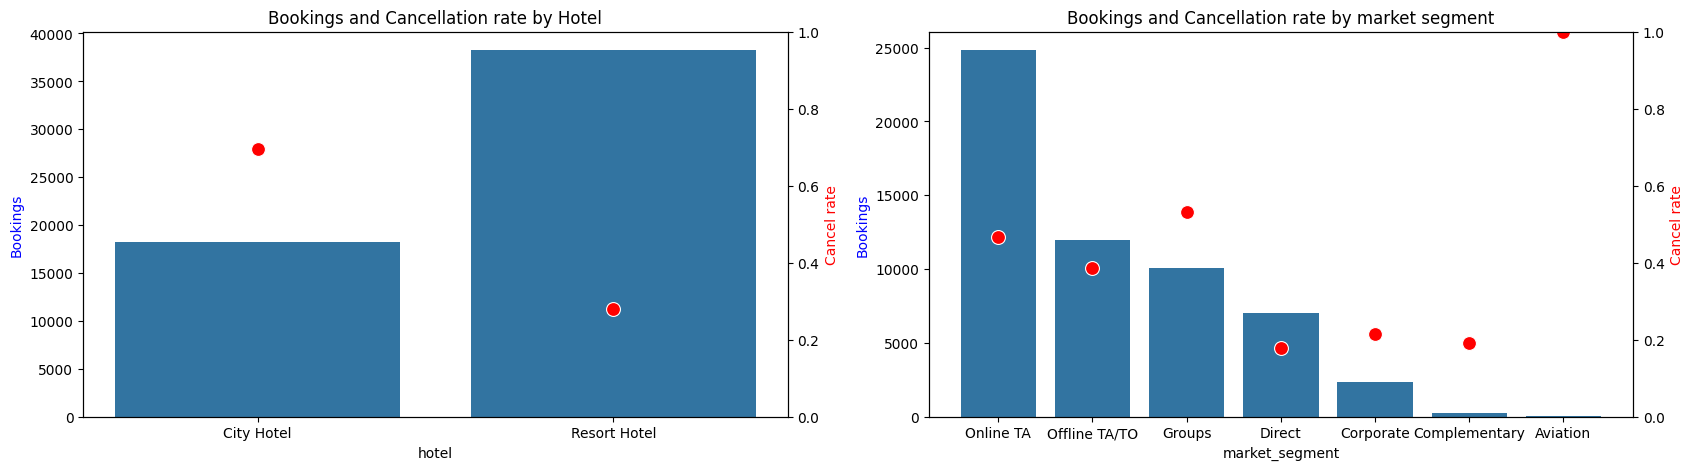

In [305]:
data_plot1=summary_hotel.reset_index()
data_plot2=summary_market.reset_index()

fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=data_plot1["hotel"],
    y=data_plot1["bookings"],
    ax=ax1,
)
ax1.set_ylabel("Bookings", color="blue")
ax1.set_title("Bookings and Cancellation rate by Hotel")

ax1b=ax1.twinx()
sns.scatterplot(
    x=data_plot1["hotel"],
    y=data_plot1["cancellation_rate"],
    ax=ax1b,
    marker='o',
    s=100,
    color="red"
)
ax1b.set_ylabel("Cancel rate", color="red")
ax1b.set_ylim(0,1)


sns.barplot(
    x=data_plot2["market_segment"],
    y=data_plot2["bookings"],
    ax=ax2
)
ax2.set_ylabel("Bookings", color="blue")
ax2.set_title("Bookings and Cancellation rate by market segment")

ax2b=ax2.twinx()
sns.scatterplot(
    x=data_plot2["market_segment"],
    y=data_plot2["cancellation_rate"],
    ax=ax2b,
    marker='o',
    s=100,
    color="red"
)
ax2b.set_ylabel("Cancel rate", color="red")
ax2b.set_ylim(0,1)

plt.show()


##### Cancelation rate per segment (numerical variables quantiles)

In [298]:
#Create bins/group of lead_time using deciles
df["lead_time_bin"] = pd.qcut(df["lead_time"], q=10, duplicates="drop")

#Explore the cancellation rate by decil
summary_lead_time = (
    df.groupby("lead_time_bin",observed=True)["is_canceled"].agg(
        bookings=("count"),
        cancellations=("sum"),
        cancellation_rate=("mean")
    ).sort_values("lead_time_bin", ascending=True)
)
#Add share of bookings and  cancellations 
summary_lead_time["share_of_total_bookings"] = (summary_lead_time["bookings"] / summary_lead_time["bookings"].sum())
summary_lead_time["share_of_total_cancellations"] = (summary_lead_time["cancellations"] / summary_lead_time["cancellations"].sum())

#Adjust for print
count_=summary_lead_time["cancellation_rate"].count()
min_cancel=100*summary_lead_time["cancellation_rate"].iloc[0].round(3)
max_cancel=100*summary_lead_time["cancellation_rate"].iloc[count_-1].round(3)

print("Insight: Cancellation rates increase with lead time")
print(f"Bookings made closer to the check-in date (0–2 days) are canceled {min_cancel}% of the time")
print(f"while bookings made far in advance (250+ days) have cancellation rates around {max_cancel}%")
print("")
display(summary_lead_time)

Insight: Cancellation rates increase with lead time
Bookings made closer to the check-in date (0–2 days) are canceled 10.5% of the time
while bookings made far in advance (250+ days) have cancellation rates around 61.7%



,bookings,cancellations,cancellation_rate,share_of_total_bookings,share_of_total_cancellations
lead_time_bin,,,,,
"(-0.001, 2.0]",6303,664,0.105347,0.111556,0.028387
"(2.0, 10.0]",5067,960,0.189461,0.089680,0.041041
"(10.0, 26.0]",5802,1972,0.339883,0.102688,0.084306
"(26.0, 44.0]",5563,2472,0.444365,0.098458,0.105682
"(44.0, 69.0]",5538,2488,0.449260,0.098016,0.106366
"(69.0, 98.0]",5800,2803,0.483276,0.102653,0.119832
"(98.0, 135.0]",5511,2938,0.533116,0.097538,0.125604
"(135.0, 181.0]",5720,2779,0.485839,0.101237,0.118806
"(181.0, 251.0]",5558,2838,0.510615,0.098370,0.121329


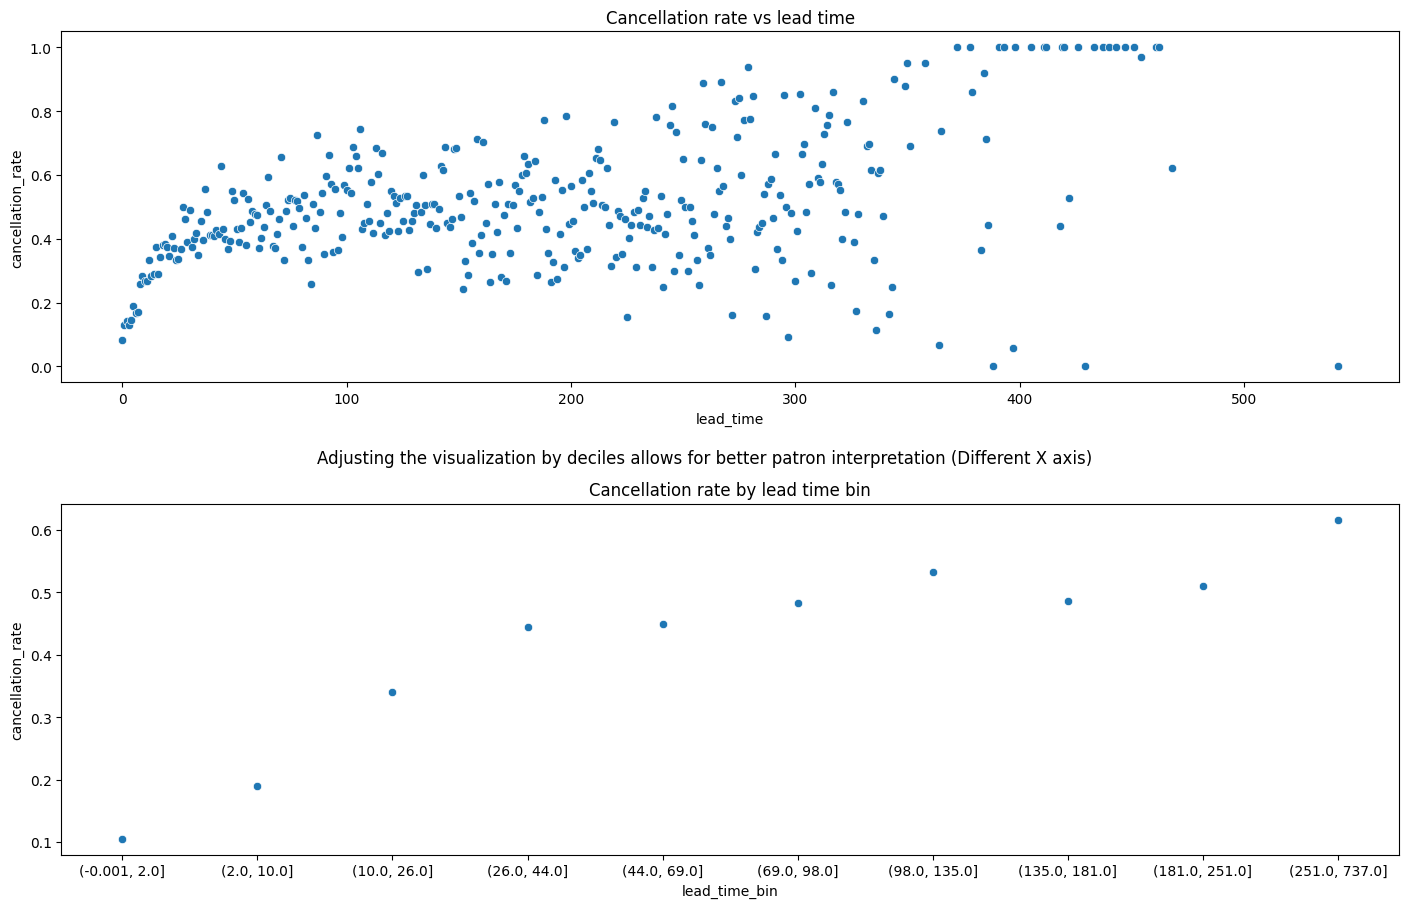

In [325]:
plot_data1 = (
    df.groupby("lead_time")["is_canceled"].agg(
        bookings="count",
        cancellations="sum",
        cancellation_rate="mean"
    )
    .query("bookings > 12")   # keep only groups with >12 bookings (percentile 5)
    .sort_values("lead_time", ascending=True)
    .reset_index()
)

plot_data2 = summary_lead_time.reset_index()

fig, (ax1,ax2)= plt.subplots(2,1, figsize=(15, 10))

sns.scatterplot(
    x=plot_data1["lead_time"], 
    y=plot_data1["cancellation_rate"],
    ax=ax1
    )
ax1.set_title("Cancellation rate vs lead time")

sns.scatterplot(
    x=plot_data2["lead_time_bin"].astype(str), 
    y=plot_data2["cancellation_rate"],
    ax=ax2
    )
ax2.set_title("Cancellation rate by lead time bin")

plt.tight_layout(pad=4.0)

fig.text(
    0.5, 0.495,
    "Adjusting the visualization by deciles allows for better patron interpretation (Different X axis)",
    ha="center", va="center", fontsize=12, color="black"
)

plt.show()

In [332]:
df["adr_bin"] = pd.qcut(df["adr"], q=10, duplicates="drop")

summary_adr = (
    df.groupby("adr_bin",observed=True)["is_canceled"].agg(
        bookings=("count"),
        cancellations=("sum"),
        cancellation_rate=("mean")
    ).sort_values("adr_bin", ascending=True)
)
summary_adr["share_of_total_bookings"] = (summary_adr["bookings"] / summary_adr["bookings"].sum())
summary_adr["share_of_total_cancellations"] = (summary_adr["cancellations"] / summary_adr["cancellations"].sum())

print("Insight: Cancelation rate appears to increase with the cost per nigth until decil 80 (111-133)")
print("and then falls for high ticket reservations 133+, especially for bin (171-508): premium reservations")
print("Cancelattion rates for budget options (0 to 55) are particulary low at 22%")

display(summary_adr)

Insight: Cancelation rate appears to increase with the cost per nigth until decil 80 (111-133)
and then falls for high ticket reservations 133+, especially for bin (171-508): premium reservations
Cancelattion rates for budget options (0 to 55) are particulary low at 22%


,bookings,cancellations,cancellation_rate,share_of_total_bookings,share_of_total_cancellations
adr_bin,,,,,
"(-0.001, 41.98]",5651,1280,0.226509,0.100016,0.054722
"(41.98, 54.9]",5653,1281,0.226605,0.100051,0.054765
"(54.9, 63.4]",5648,2367,0.419086,0.099963,0.101193
"(63.4, 73.15]",5649,2036,0.360418,0.099981,0.087042
"(73.15, 84.71]",5650,2386,0.422301,0.099998,0.102005
"(84.71, 96.0]",5691,2568,0.451239,0.100724,0.109786
"(96.0, 111.6]",5622,2848,0.506581,0.099503,0.121756
"(111.6, 133.0]",5659,3354,0.592684,0.100158,0.143388
"(133.0, 171.0]",5638,2907,0.515608,0.099786,0.124279


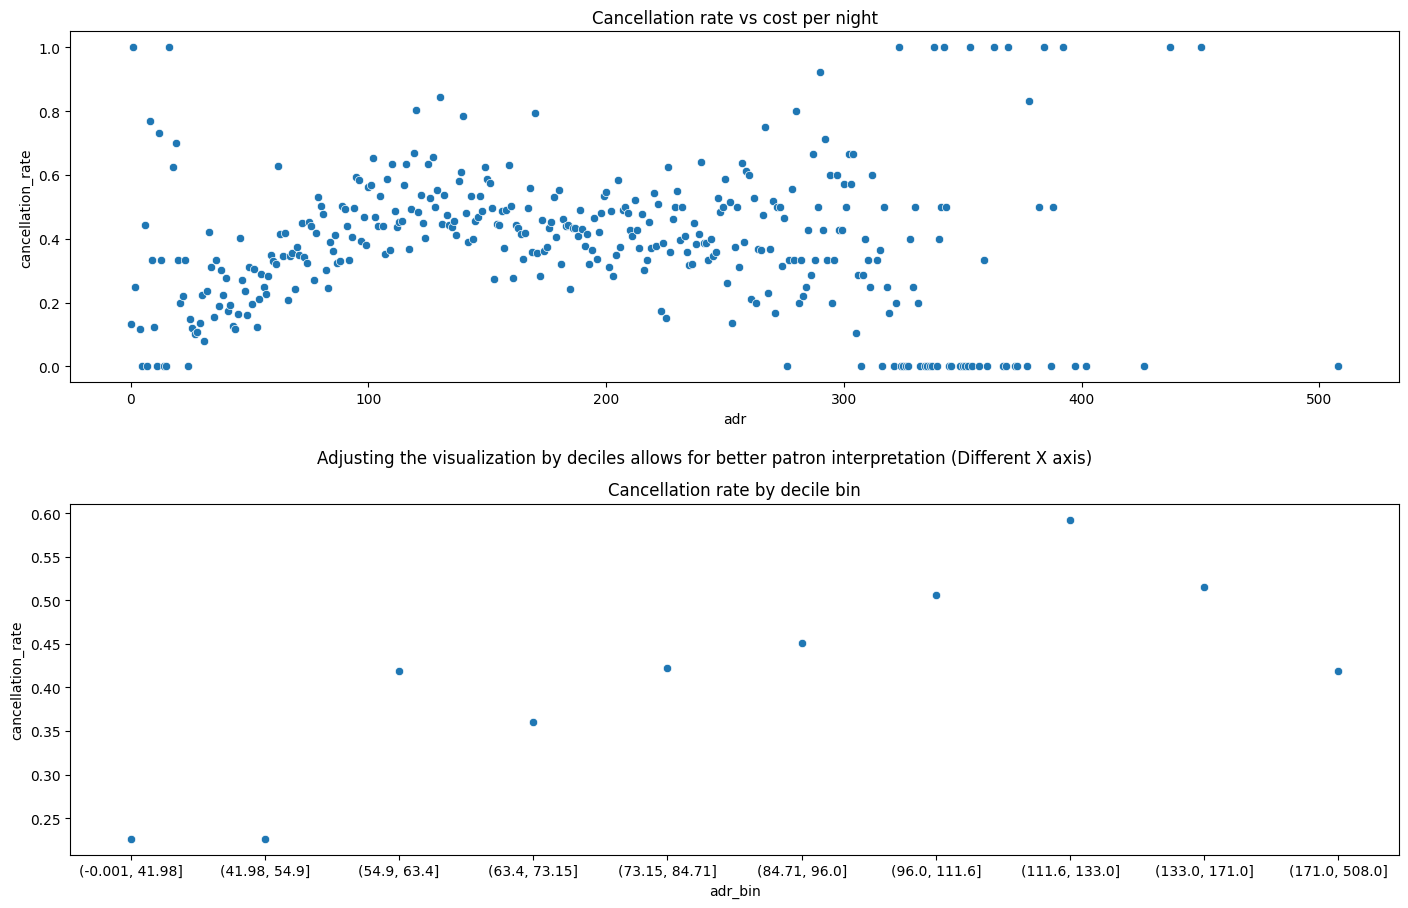

In [327]:
plot_data1 = (
    df.groupby(df["adr"].round(0))["is_canceled"].agg(
        bookings="count",
        cancellations="sum",
        cancellation_rate="mean"
    )
    #.query("bookings > 12")   # keep only groups with >12 bookings (percentile 5)
    .sort_values("adr", ascending=True)
    .reset_index()
)

plot_data2 = summary_adr.reset_index()

fig, (ax1,ax2)= plt.subplots(2,1, figsize=(15, 10))

sns.scatterplot(
    x=plot_data1["adr"], 
    y=plot_data1["cancellation_rate"],
    ax=ax1
    )
ax1.set_title("Cancellation rate vs cost per night")

sns.scatterplot(
    x=plot_data2["adr_bin"].astype(str), 
    y=plot_data2["cancellation_rate"],
    ax=ax2
    )
ax2.set_title("Cancellation rate by decile bin")

plt.tight_layout(pad=4.0)
fig.text(
    0.5, 0.495,
    "Adjusting the visualization by deciles allows for better patron interpretation (Different X axis)",
    ha="center", va="center", fontsize=12, color="black"
)

plt.show()

### PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [333]:
# Festaures selected
features_num = ["lead_time", "adr"]
features_cat = ["hotel", "market_segment"]

# Dummies creation
X_cat = pd.get_dummies(df[features_cat], drop_first=True)
X_num = df[features_num]

X = pd.concat([X_num, X_cat], axis=1)

y = df["is_canceled"].astype(int) # Target variable

#### PC 2 components 2D view

In [334]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42) #2 components
Z = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(Z, columns=["PC1","PC2"])
pc_df["is_canceled"] = y.values

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 4))
print("The Total cumulative variance explained by the first two PC is:", np.round(pca.explained_variance_ratio_.sum(), 4))

Explained variance ratio: [0.206  0.1628]
The Total cumulative variance explained by the first two PC is: 0.3688


Altough the variance explained is relatively low, it allows for some categorization
3 main groups are created based on the 2D representation


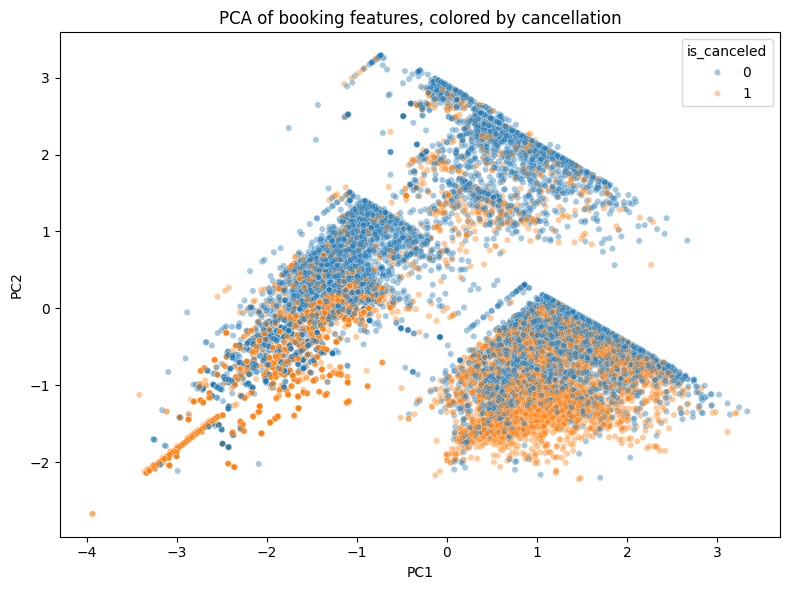

Insight:
Althoug the 2D PCA is unable to separate cancelled bookings,these are mostly concentrated in the negative part of PC2


In [346]:
print("Altough the variance explained is relatively low, it allows for some categorization")
print("3 main groups are created based on the 2D representation")

plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df.sample(min(20000, len(pc_df)), random_state=42),
                x="PC1", y="PC2", hue="is_canceled", alpha=0.4, s=20)
plt.title("PCA of booking features, colored by cancellation")
plt.tight_layout()
plt.show()

print("Insight:")
print("Althoug the 2D PCA is unable to separate cancelled bookings,these are mostly concentrated in the negative part of PC2")

##### Exploring PC components

In [45]:
loadings = pd.Series(pca.components_[0], index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
print("Top loadings for PC1:")
print(loadings.head(10))

Top loadings for PC1:
market_segment_Online TA        0.562231
market_segment_Groups          -0.475552
lead_time                      -0.411670
adr                             0.363884
market_segment_Offline TA/TO   -0.331657
hotel_Resort Hotel              0.170454
market_segment_Direct           0.125939
market_segment_Complementary   -0.030304
market_segment_Corporate       -0.005787
dtype: float64


In [344]:
loadings = pd.Series(pca.components_[1], index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
print("Top loadings for PC2:")
print(loadings.head(10))

print("")
print("Insight:")
print("Based on the composition of PC2 we can infer bookings are affected by market_segment_Online TA and lead_time since these affect PC2 negatively. ")
print("On the other hand market_segment_Direct and market_segment_Corporate seems to have lower number of cancellations as they impact PC2 possitively")

Top loadings for PC2:
market_segment_Direct           0.500748
market_segment_Online TA       -0.441484
lead_time                      -0.379765
market_segment_Corporate        0.378843
hotel_Resort Hotel              0.359396
adr                            -0.237321
market_segment_Groups          -0.215199
market_segment_Complementary    0.136736
market_segment_Offline TA/TO    0.126912
dtype: float64

Insight:
Based on the composition of PC2 we can infer bookings are affected by market_segment_Online TA and lead_time since these affect PC2 negatively. 
On the other hand market_segment_Direct and market_segment_Corporate seems to have lower number of cancellations as they impact PC2 possitively
